데이터 분할
- 의미 있는 분석 결과 도출을 위해서는 수집된 데이터를 분석을 위한 데이터로 전 처리 작업이 필요하다.
- 전 처리 과정은 필요 없는 변수나 문제가 있는 이상치를 제거한다.
- 데이터가 너무 크거나 모형을 만들거나 검증을 위해서는 데이터를 분할한다.
- 데이터 분할에는 학습/테스트 데이터 분할과 변수를 줄이는 차원 축소 등이 있다.
- 학습 데이터로 모델을 학습시키고 이렇게 학습된 모델을 통해서 예측이나 분석한다.
- 시행을 통해서 얻은 결과값 혹은 예측 값을 실제 결과값과 비교하여 모델의 성능을 평가한다.
- 데이터 분할을 위해서는 학습/테스트 데이터의 크기과 랜덤 샘플링 여부 등을 결정한다.
- 일반적으로 학습 데이터와 테스트 데이터의 크기는 7:3, 8:2 로 분리한다.
- 학습 데이터를 다시 분할해서 학습 데이터와 학습된 모델을 일차 검증하는 검증 데이터 3가지로 분할한다.

DT 파라미터

- max_depth : 트리의 최대 깊이
- max_features : 최적의 분할을 위해 고려할 최대 피처 개수
- max_leaf_nodes : 말단 노드의 최대 개수
- min_sample_split : 노드를 분할하기 위한 최소한의 샘플 데이터. 디폴트 2. 작게 설정할 수록 분할 되는 노드 증가. 과적합 가능성 증가
- min_sample_split :

의사결정 나무는 간단하게 if/else와 같이 특정 조건을 기준으로 나누어 분류/회귀를 진행하는 tree 구조의 분류/회귀 데이터마이닝 기법이다.

stats model 통계 / 통계 분석  
sklearn model 머신러닝 / 모형예측 평가에 특화

In [75]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [76]:
import pandas as pd
iris = load_iris()
print(iris.keys())
print('iris target 이름 :',iris.target_names)
iris_data = iris.data # 독립변수
iris_label = iris.target # 종속변수

iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()
# iris_df.label.value_counts()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris target 이름 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [78]:
# 학습용, 검증용 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=10)


X는 2차원 넘파이 배열이나 데이터프레임(2차원)  
y는 1차원 넘파이 배열이나 시리즈(1차원)

In [79]:
 # 학습수행
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [80]:
# 예측 수행
pred = dt_clf.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
# 분산 분류 평가(더 중요 시험문제 많이 나옴) = accuracy_score 

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 1.0000


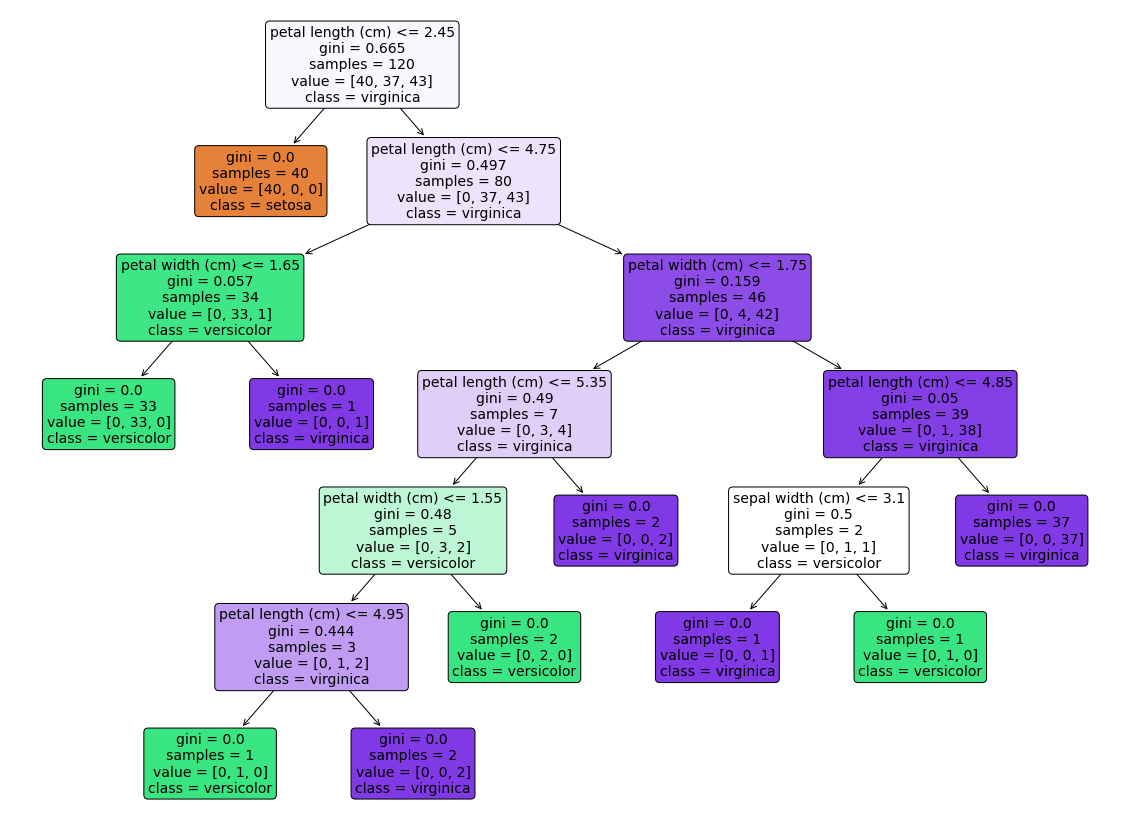

In [83]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf,filled=True,
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True,
                fontsize=14)
plt.show()